In [1]:
import seaborn as sns
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import praw
with open("config.py", "r") as f:
    secret = f.read()    

user_agent = "Scraper 1.0 by /u/street_raat"
reddit = praw.Reddit(
    client_id="cDqi0tPvG8rAKV4ucqwVKQ",
    client_secret = "26NdjuaWX_EghggDpD3JExP0NWUSYA",
    user_agent = user_agent
)

In [10]:
# for loop to iterate through posts
headlines = set()

for submission in reddit.subreddit('politics').hot(limit=None):
#     print(submission.title)
#     print(submission.id)
#     print(submission.author)
#     print(submission.created_utc)
#     print(submission.score)
#     print(submission.upvote_ratio)
#     print(submission.url)
#     break
    headlines.add(submission.title)
print(len(headlines))

721


In [11]:
# create DF
scraped_df = pd.DataFrame(headlines)
scraped_df.head()

,0
0,Right-Wing News Site Declares Trump 'Unfit To ...
1,Jayapal Warns GOP Will Enact Federal Abortion ...
2,Judge puts Biden on the spot over immunity for...
3,Top Election Officials in Arizona County Leave...
4,Dems meddle in Trump-Hogan proxy war in Maryland


In [12]:
# create CSV

scraped_df.to_csv('headlines.csv', header=False, encoding='utf-8', index=False)

In [13]:
import nltk

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vowel\AppData\Roaming\nltk_data...


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': "Right-Wing News Site Declares Trump 'Unfit To Be Anywhere Near Power Ever Again'",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.6124,
  'headline': 'Jayapal Warns GOP Will Enact Federal Abortion Ban If It Retakes Congress',
  'neg': 0.333,
  'neu': 0.667,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Judge puts Biden on the spot over immunity for Saudi crown prince Mohammed bin '
              'Salman',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [16]:
records_df = pd.DataFrame.from_records(results)
records_df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Right-Wing News Site Declares Trump 'Unfit To ...
1,0.333,0.667,0.000,-0.6124,Jayapal Warns GOP Will Enact Federal Abortion ...
2,0.000,1.000,0.000,0.0000,Judge puts Biden on the spot over immunity for...
3,0.339,0.508,0.153,-0.2960,Top Election Officials in Arizona County Leave...
4,0.358,0.642,0.000,-0.5994,Dems meddle in Trump-Hogan proxy war in Maryland


In [20]:
records_df['label'] = 0 
records_df.loc[records_df['compound'] > 0.2, 'label'] = 1
records_df.loc[records_df['compound'] < -0.2, 'label'] = -1
records_df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Right-Wing News Site Declares Trump 'Unfit To ...,0
1,0.333,0.667,0.000,-0.6124,Jayapal Warns GOP Will Enact Federal Abortion ...,-1
2,0.000,1.000,0.000,0.0000,Judge puts Biden on the spot over immunity for...,0
3,0.339,0.508,0.153,-0.2960,Top Election Officials in Arizona County Leave...,-1
4,0.358,0.642,0.000,-0.5994,Dems meddle in Trump-Hogan proxy war in Maryland,-1


In [21]:
concise_df = records_df[['headline', 'label']]

In [22]:
concise_df.to_csv('reddit_headlines_and_labels.csv', encoding = 'utf-8', index=False)

In [23]:
concise_df.label.value_counts()

 0    298
-1    239
 1    184
Name: label, dtype: int64

In [24]:
# checking the headlines for accuracy
# seems somewhat accurate

print('Positive Headlines:\n')
pprint(list(concise_df[concise_df['label']==1].headline)[:5], width=200)

print('Negative Headlines:\n')
pprint(list(concise_df[concise_df['label']==-1].headline)[:5], width=200)

Positive Headlines:

['Most House Republicans who backed a Jan. 6 commission have won primaries so far',
 'Neil Gorsuch Couldn’t Save Tribal Sovereignty From His Conservative Colleagues’ Wrath',
 'Newsom targets DeSantis in Independence Day ad: "Freedom is under attack"',
 'What Happens if Americans Stop Recognizing the Legitimacy of the Supreme Court? We Asked a Constitutional Scholar.',
 'Taking on new challenger, Sen. Michael Bennet says democracy — and fighting Trump’s supreme court — is on the line']
Negative Headlines:

['Jayapal Warns GOP Will Enact Federal Abortion Ban If It Retakes Congress',
 'Top Election Officials in Arizona County Leave Amid Threats',
 'Dems meddle in Trump-Hogan proxy war in Maryland',
 'Incendiary Republican ads boasting of ‘hunting’ rivals raise fears of violence | Ads like Greitens’ in which he says ‘get a Rino hunting permit’ could lead people to rationalize acts of violence, '
 'experts warn',
 'Gov. Murphy pledges to sign new gun bills Tuesday after

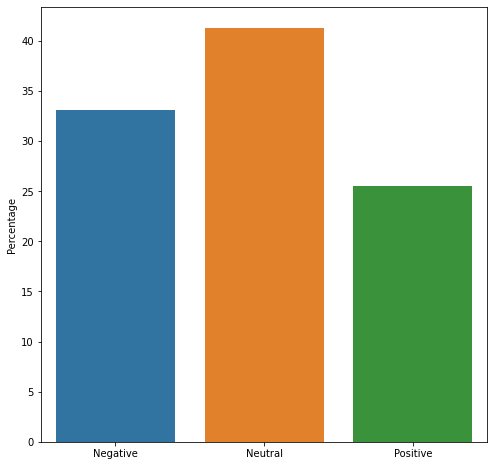

In [27]:
fig, ax=plt.subplots(figsize=(8,8))

counts = concise_df.label.value_counts(normalize=True) *100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel("Percentage")

plt.show()